In [ ]:
!pip3 install torch

In [ ]:
import torch

Gradient descent is an optimizing algorithm which will try to minimize the error function of a linear model until it is trained to fit our data.


w=weight or slope, 
b=bias or y intercept,
y = w*x + b, equ of line modeled as. 
Using Linear model

In [ ]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [ ]:
def forward(x):
  y = w*x + b 
  return y

In [ ]:
x = torch.tensor(2) 
forward(x)  # we can predict as many input as we want, say forward([[4], [7]])but wrapped in sime bracket

tensor(7., grad_fn=<AddBackward0>)

Implementing Linear model Class

In [ ]:
import torch
from torch.nn import Linear

In [ ]:
torch.manual_seed(1)  # sets a seed for generating random values, when creating a linear model it will be given a random values
model = Linear(in_features=1, out_features=1) # create a linear model, which means for every one prediction i.e for every output, there is one in_feature, single input
print(model.bias, model.weight) # To determine model's parameters

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [ ]:
x = torch.tensor([2.0])
print(model(x))   # prediction using model

x = torch.tensor([[2.0], [3.3]])
print(model(x))  # prediction for multiple inputs

tensor([0.5891], grad_fn=<AddBackward0>)
tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward0>)


Custom modules, A robust and efficient way of building neural networks with pytorch

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class LR(nn.Module):  # Creating new class for Linear regression. Inherit from base class Module
  def __init__(self, input_size, output_size):  # Use this constructor to initialize new instances of new class
    super().__init__()  # call super method for inheritance 
    self.linear = nn.Linear(input_size, output_size)  # initialize the instances
  
  # create a forward method so that it can be accessed using model object to predict
  def forward(self, x):
    pred = self.linear(x)
    return pred


In [ ]:
torch.manual_seed(1)
# initialize new model and its instances
model = LR(1, 1)
# print(list(model.parameters()))  # print it in the form of list for better viewing


In [ ]:
x = torch.tensor([1.0])
print(model.forward(x)) # call the method forward to predict 

x = torch.tensor([[1.0], [2.0]]) # two predictions based on two independent variables
print(model.forward(x))

tensor([0.0739], grad_fn=<AddBackward0>)
tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)


Create dataset. 
To train a model to develop new weight and bias values based on previously labeled data rather than working with random parameters. 

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

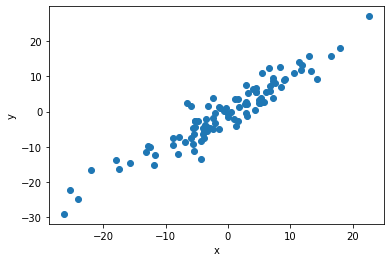

In [ ]:
# creating datasets
X = torch.randn(100, 1)*10 # shape of tensor to be 100 rows and 1 col, returns tensor filled with random numbers which are normally distributed
y = X + 3*torch.randn(100, 1) # add a noise to y data so that the data points to be relatively spaced out around 0, small standard deviation, 
# print(X) # normally distributed tensors, relatively small numbers centered around 0 so we multiply by 10 to set larger range
plt.plot(X.numpy(), y.numpy(), 'o')  #'y gives a straight dotted line if y = X which shows al data points are normally distributed within X
plt.ylabel('y')
plt.xlabel('x')

# now that we have created a noisy dataset, it is time to train our model

In [ ]:
class LR(nn.Module):  # Creating new class for Linear regression. Inherit from base class Module
  def __init__(self, input_size, output_size):  # Use this constructor to initialize new instances of new class
    super().__init__()  # call super method for inheritance 
    self.linear = nn.Linear(input_size, output_size)  # initialize the instances
  
  # create a forward method so that it can be accessed using model object to predict
  def forward(self, x):
    pred = self.linear(x)
    return pred


In [ ]:
torch.manual_seed(1)
# initialize new model and its instances
model = LR(1, 1)
# print(list(model.parameters()))  # print it in the form of list for better viewing


In [ ]:
# Obtain model parameters by unpacking the model 
[w, b] = model.parameters()
# print(w, b)  # we see that weight is a 2 dimensional array with one row and one column
# w1 = w[0][0].item() # access using row 0 and col 0 index for weight and apply .item() method to print single python number from both tensor values
# b1 = b[0].item() # single item at 0th index
# print(w1, b1)  # print parameters

# for clean method create a function to get the parameters
def get_params():
  return(w[0][0].item(), b[0].item())

In [ ]:
# plot the linear model along side the data points
def plot_fit(title):
  plt.title = title

  # To determine neumerical expressions for x1 and y1
  w1, b1 = get_params()  
  x1 = np.array([-30, 30]) # x values between -30 to 30, make it an array not tensor to make it compatible with pyplot
  y1 = w1 * x1 + b1 # From the two x points from -30 to 30 we can get two y points
  plt.plot(x1, y1, 'r') # plot it as redline
  plt.scatter(X, y) # plot datasets
  plt.show()

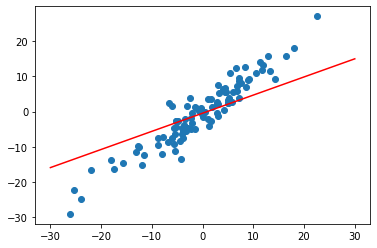

In [ ]:
plot_fit('Initial Model') # call the plot. Since it is not the plot we want, we will need to use gradient descent to update its parameters

Loss Function

We will now find the parameters of a line that fits the data well

*   (y - y_hat)**2

*   (y - wx + b)**2


*   (y - wx + 0)**2  # keep the bias to 0 by removing bias
*   (y - wx)**2

loss = (3 - w(-3))**2 for (-3, 3), the 

*   value of w = -1 gives the minimum error = 0



Gradient descent


---


How to train our model to determine the weight parameters which will minimize the error function ( can be done with gradient descent).




*   First we compute the derivative of the loss function.


```
# loss = (3 - w(-3))**2
# f'(w) = 18(w+1)
```


*   Then, subtract in the current weight value of the line. Whatever the weight may be, this will give the gradient value(f'(w)).

```
# w1 = w0 - f'(w)
```
The gradient value is subtracted fromt he current weight w0 to give the new updated weight, w1. The new weight should result in a smaller error than the previous one. We keep doing that iteratively until we obtain a small error, until we obtain the optimal parameters for our linear model to fit the data.


---



We are descending with the gradient.
To ensure optimal result, one should descend with really small steps and we do this by multiplying a gradient with a learning rate, small number.



```
# w1 = w0 - learnigrate*f'(w)

```



Mean Squared Error


---

similar to error function but here now we consider the biases

```
# (y - wx + b) ** 2
```


```
# MSE = 1/N * sum(y.i - mean(y.i))**2
# f(m, b) = 1/N * sum(y.i - (mx.i + b))**2
```



```
# New weight
# m1 = m0 - learningrate * f'(m)

# new bias 
# b1 = b0 - learnigrate * f'(b)
```




Training - Code Implementation

In [ ]:
# builtin loss function
criterion = nn.MSELoss()
# optimizer, stochastic gradient descent 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # stochastic gradient descent minimizes total loss one sample at a time


In [ ]:
# training our model
epochs = 100 # iterative process,  when we iterate once over the entire datset, we calculate the error function and back prapagate the gradient of error function to update the weights
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch: ", i, "loss: ", loss.item())

  losses.append(loss) # accumulate loss in the losses list
  # set gradients to zero
  optimizer.zero_grad()

  # minimize the loss at every epoch for the gradients calculated using the derivative
  loss.backward()
  optimizer.step() # update the model parameters





epoch:  0 loss:  9.185018539428711
epoch:  1 loss:  9.184844017028809
epoch:  2 loss:  9.184675216674805
epoch:  3 loss:  9.184514045715332
epoch:  4 loss:  9.184359550476074
epoch:  5 loss:  9.184209823608398
epoch:  6 loss:  9.184067726135254
epoch:  7 loss:  9.183929443359375
epoch:  8 loss:  9.183796882629395
epoch:  9 loss:  9.183670997619629
epoch:  10 loss:  9.183548927307129
epoch:  11 loss:  9.183432579040527
epoch:  12 loss:  9.183318138122559
epoch:  13 loss:  9.183210372924805
epoch:  14 loss:  9.183107376098633
epoch:  15 loss:  9.183008193969727
epoch:  16 loss:  9.18291187286377
epoch:  17 loss:  9.182820320129395
epoch:  18 loss:  9.182731628417969
epoch:  19 loss:  9.182646751403809
epoch:  20 loss:  9.182565689086914
epoch:  21 loss:  9.182487487792969
epoch:  22 loss:  9.182411193847656
epoch:  23 loss:  9.182341575622559
epoch:  24 loss:  9.182270050048828
epoch:  25 loss:  9.18220329284668
epoch:  26 loss:  9.182140350341797
epoch:  27 loss:  9.182079315185547
epoc

Text(0.5, 0, 'epoch')

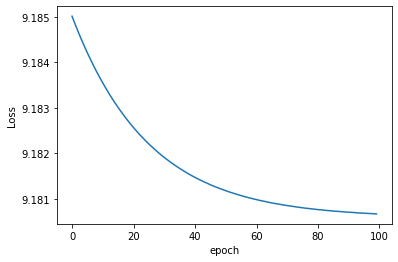

In [ ]:
# plot the loss on graph
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')


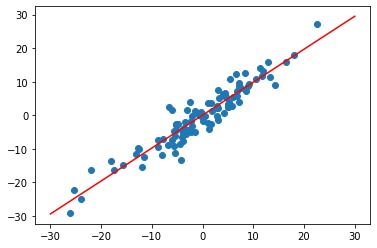

In [ ]:
plot_fit('Trained Model') # calling trained fit model